In [53]:
import sys
sys.path.append('../')
import potentials

In [54]:
import os
import numpy as np
from os.path import join
import json
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplt
from collections import defaultdict
import matplotlib
from scipy.stats import norm
from scipy.special import expit
plt.rc("text", usetex=True)



In [55]:
nr, nc = 128, 256
ksize = 13
tau = 0.1

Basic task

In [52]:
np.random.seed(110104)
U, V, P, L = potentials.potential_features(nr, nc, ksize, nonlinear=False)
C = np.stack([U, V], 0)
L_normed = (L - L.mean()) / L.std()
logits = L_normed # 0.5 * (L_normed - 1)
prob = expit(logits)

U1 = np.random.rand(nr, nc)
assignment = U1 < prob

swt = 0.5
eps0 = np.random.normal(size=(nr, nc))
eps1 = potentials.sample_gp2d(nr//4, nc//4, b=4.0 / ksize)
eps1 = potentials.up(eps1, factor=2)
eps = (1.0 - swt) * eps0 + swt * eps1
outcome = - L_normed + eps + tau * assignment

In [56]:
basic = dict(
    outcome=outcome,
    prob=prob,
    assignment=assignment,
)

Spatial

In [57]:
np.random.seed(110104)
U, V, P, L = potentials.potential_features(nr, nc, ksize, nonlinear=False)
C = np.stack([U, V], 0)
L_normed = (L - L.mean()) / L.std()
logits = L_normed # 0.5 * (L_normed - 1)
U2 = potentials.sample_gp2d(nr//4, nc//4, b=8.0 / ksize)
U2 = potentials.up(U2, factor=2)
# logits = np.sqrt(0.5) * (logits + U2)
logits += U2
prob = expit(logits)

U1 = np.random.rand(nr, nc)
assignment = U1 < prob

swt = 0.5
eps0 = np.random.normal(size=(nr, nc))
eps1 = potentials.sample_gp2d(nr//4, nc//4, b=4.0 / ksize)
eps1 = potentials.up(eps1, factor=2)
eps = (1.0 - swt) * eps0 + swt * eps1
outcome = - L_normed + eps + tau * assignment

In [58]:
spatial = dict(
    outcome=outcome,
    prob=prob,
    assignment=assignment,
)

Non-linear

In [59]:
np.random.seed(110104)
U, V, P, L = potentials.potential_features(nr, nc, ksize, nonlinear=True)
C = np.stack([U, V], 0)
L_normed = (L - L.mean()) / L.std()
logits = L_normed # 0.5 * (L_normed - 1)
prob = expit(logits)

U1 = np.random.rand(nr, nc)
assignment = U1 < prob

swt = 0.5
eps0 = np.random.normal(size=(nr, nc))
eps1 = potentials.sample_gp2d(nr//4, nc//4, b=4.0 / ksize)
eps1 = potentials.up(eps1, factor=2)
eps = (1.0 - swt) * eps0 + swt * eps1
outcome = - L_normed + eps + tau * assignment

In [60]:
nonlinear = dict(
    outcome=outcome,
    prob=prob,
    assignment=assignment,
)

In [1]:
fig, axs = pplt.subplots(nrows=3, ncols=3, wspace=0.5, span=False)
plt.axis("off")
axs.format(
    leftlabels=["Linear task", "Linear  task with extra\nspatial treatment corr.", "Non-linear task"],
    # toplabels=["Treatment prob.", "Assignment", "Outcome"],
)
# cmap = ["greys_r", "Reds", "Blues"]
rows = [basic, spatial, nonlinear]
cols = ['prob', 'assignment', 'outcome']
m = [[] for i in range(3)]
for ir, r in enumerate(rows):
    for ic, c in enumerate(cols):
        ax = axs[ir, ic]
        kwargs = dict(vmin=0.0, vmax=1.0) if ic == 0 else dict()
        m[ic] = ax.imshow(r[c].astype(float), cmap="greys_r", **kwargs)
        ax.set_xticks([])
        ax.set_yticks([])
fig.colorbar(m[0], loc="t", length=0.75, col=1, label="Treatment prob.")
fig.colorbar(m[1], loc="t", length=0.75, ticks=[0.0, 1.0], col=2, label="Assignment")
fig.colorbar(m[2], loc="t", length=0.75, col=3, label="Outcome")
plt.savefig("../figures/simstudy_data.pdf", bbox_inches="tight")


NameError: name 'pplt' is not defined

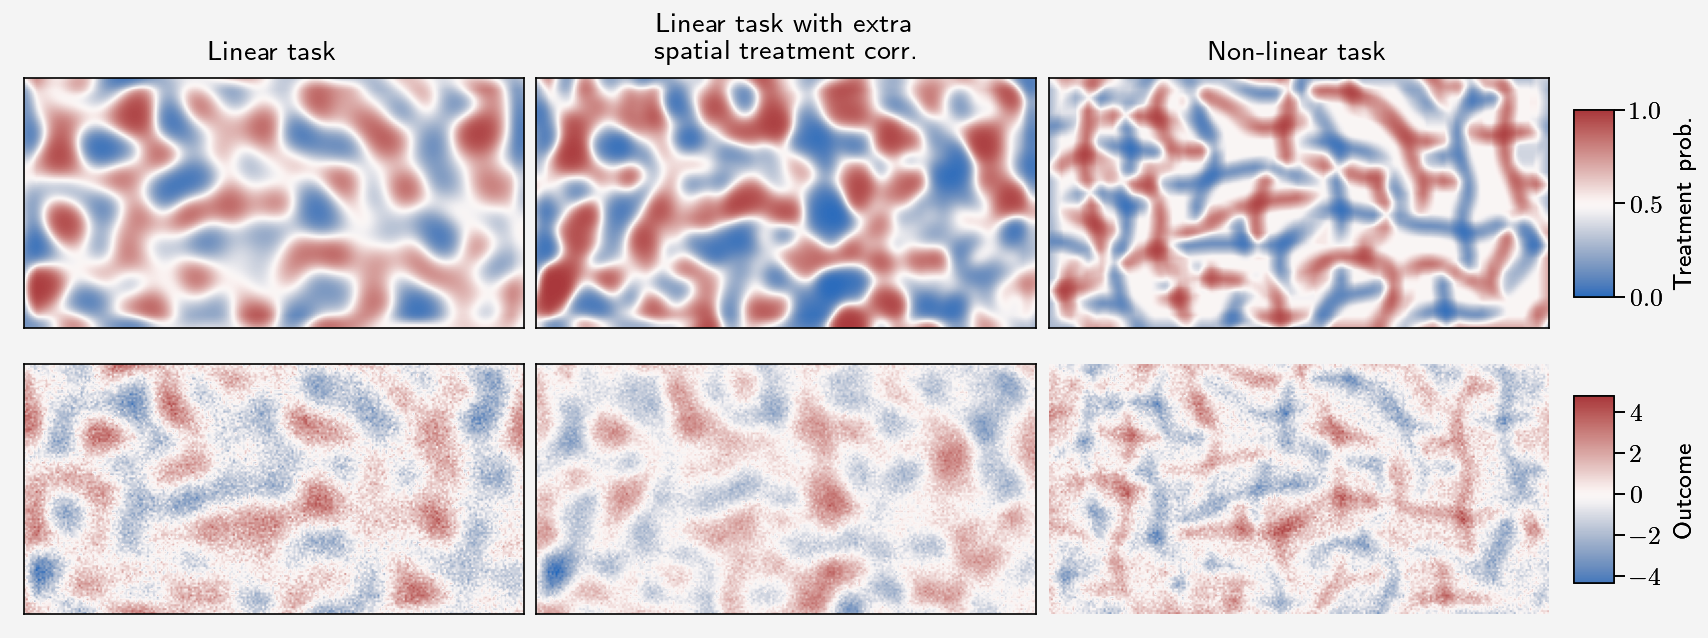

In [62]:
fig, axs = pplt.subplots(nrows=2, ncols=3, wspace=0.5, span=False)
plt.axis("off")
axs.format(
    toplabels=["Linear task", "Linear  task with extra\nspatial treatment corr.", "Non-linear task"],
    # toplabels=["Treatment prob.", "Assignment", "Outcome"],
)
# cmap = ["greys_r", "Reds", "Blues"]
cols = [basic, spatial, nonlinear]
rows = ['prob', 'outcome']
m = [[] for i in range(3)]
for ir, r in enumerate(rows):
    for ic, c in enumerate(cols):
        ax = axs[ir, ic]
        kwargs = dict(vmin=0.0, vmax=1.0) if ir == 0 else dict()
        m[ir] = ax.imshow(c[r].astype(float), cmap="Vlag", **kwargs)
        ax.set_xticks([])
        ax.set_yticks([])
fig.colorbar(m[0], loc="r", length=0.75, row=1, label="Treatment prob.")
fig.colorbar(m[1], loc="r", length=0.75, row=2, label="Outcome")
plt.savefig("../figures/simstudy_data_alt.pdf", bbox_inches="tight")
